In [ ]:
!pip install ucimlrepo

In [86]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

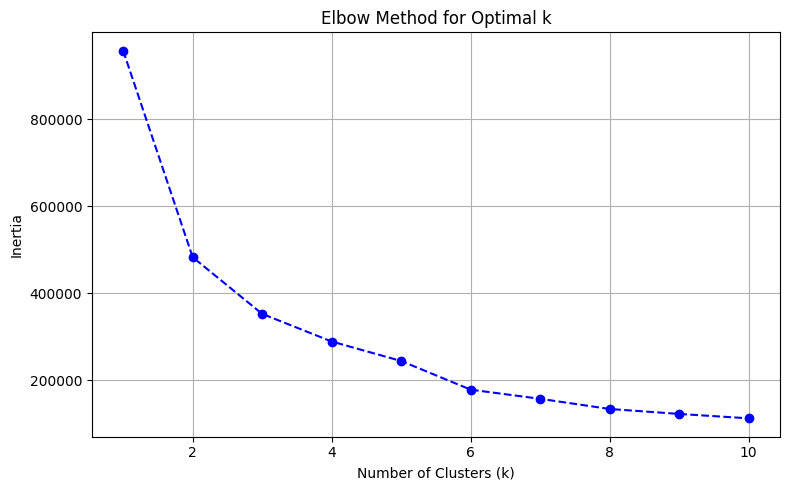

In [87]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_selected)
print(f"Silhouette Score (K-Means, k=2): {silhouette_score(X_selected, clusters_kmeans):.2f}")

Silhouette Score (K-Means, k=2): 0.45


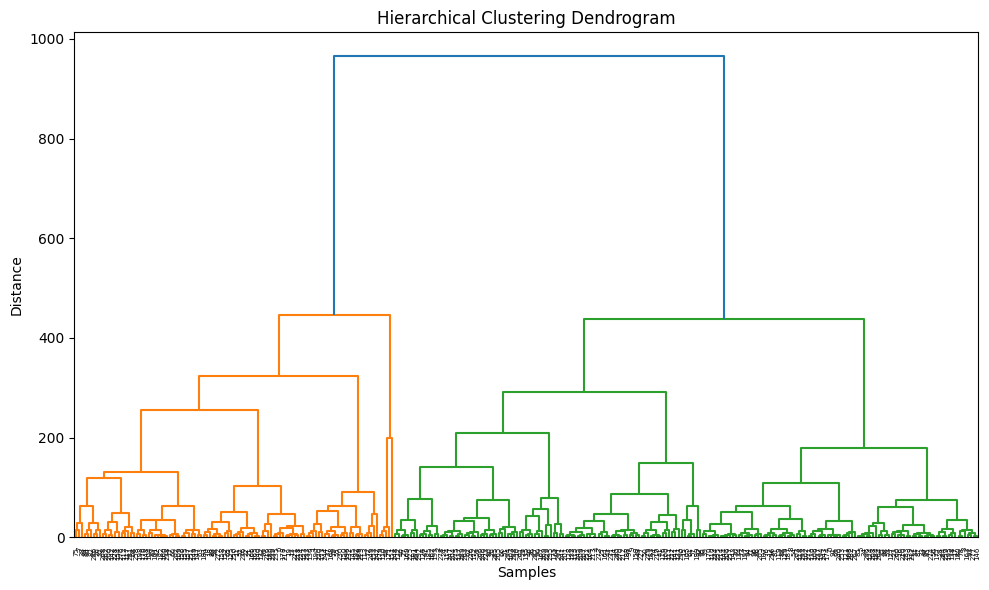

In [89]:
plt.figure(figsize=(10, 6))
linked = linkage(X_selected, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [90]:
clusters_hier = fcluster(linked, 2, criterion='maxclust')
print(f"Silhouette Score (Hierarchical, k=2): {silhouette_score(X_selected, clusters_hier):.2f}")

Silhouette Score (Hierarchical, k=2): 0.45


In [ ]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(y_cleaned, clusters_kmeans)
print(f"Adjusted Rand Index (KMeans vs. Labels): {ari_kmeans:.2f}")

# Compare Hierarchical clusters with actual labels
ari_hier = adjusted_rand_score(y_cleaned, clusters_hier)
print(f"Adjusted Rand Index (Hierarchical vs. Labels): {ari_hier:.2f}")
